# <h1><center>Introduction to Data Science - Project</center></h1>

The aim of this project is to take the assigned data set, and perform all of the necessary steps leading up to developing the predictive model, such as reconciling missing values, dealing with extreme values, Univariant Analysis, and finally developing and testing the model itself. The structure of this project follows the suggested steps in the project description given by the professor and lecturers of this course. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
happiness_survey = pd.read_csv("SomervilleHappinessSurvey2015.csv")
variable_description = pd.read_csv("Variables Description.csv", index_col = 'Symbol')

In [80]:
pd.set_option("display.max_colwidth", -1)

variable_description.index = variable_description.index.str.strip()
variable_description

<ipython-input-80-cf224636173a>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


,Description
Symbol,
D,decision attribute (D) with values 0 (unhappy) and 1 (happy)
X1,the availability of information about the city services
X2,the cost of housing
X3,the overall quality of public schools
X4,your trust in the local police
X5,the maintenance of streets and sidewalks
X6,the availability of social community events


In [81]:
variables_dict = variable_description.to_dict(orient = 'dict')

variables_dict

{'Description': {'D': ' decision attribute (D) with values 0 (unhappy) and 1 (happy)',
  'X1': ' the availability of information about the city services',
  'X2': ' the cost of housing',
  'X3': ' the overall quality of public schools',
  'X4': ' your trust in the local police',
  'X5': ' the maintenance of streets and sidewalks',
  'X6': ' the availability of social community events'}}

In [4]:
happiness_survey.describe()

,D,X1,X2,X3,X4,X5,X6
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.538462,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783
std,0.500271,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


We can tell from the variables description that the target variable in this analysis is D, which tells us if the participant of the survey was happy or unhappy with their place of residence (town, city, neighbourhood, or similar, the exact area type is unknown). The target variable is binary, meaning that it only has two states (happy or unhappy, 0 or 1), while the other independent variables range from 1 to 5

# Data Quality Analysis

## <i>Missing Values</i>

In [5]:
happiness_survey.isna().sum()

D     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

We can see that based on the function above our data set does not have any missing values. Our next step is to figure out if there are any extremes in the data, however, since the independent variables are constrained between a range of 1 to 5 and are discrete in nature, we cannot detect extremes so easily. Instead, we can look at the behavior and distribution of the independent variables and compare them.

Text(0.5, 0, ' the availability of social community events (X6)')

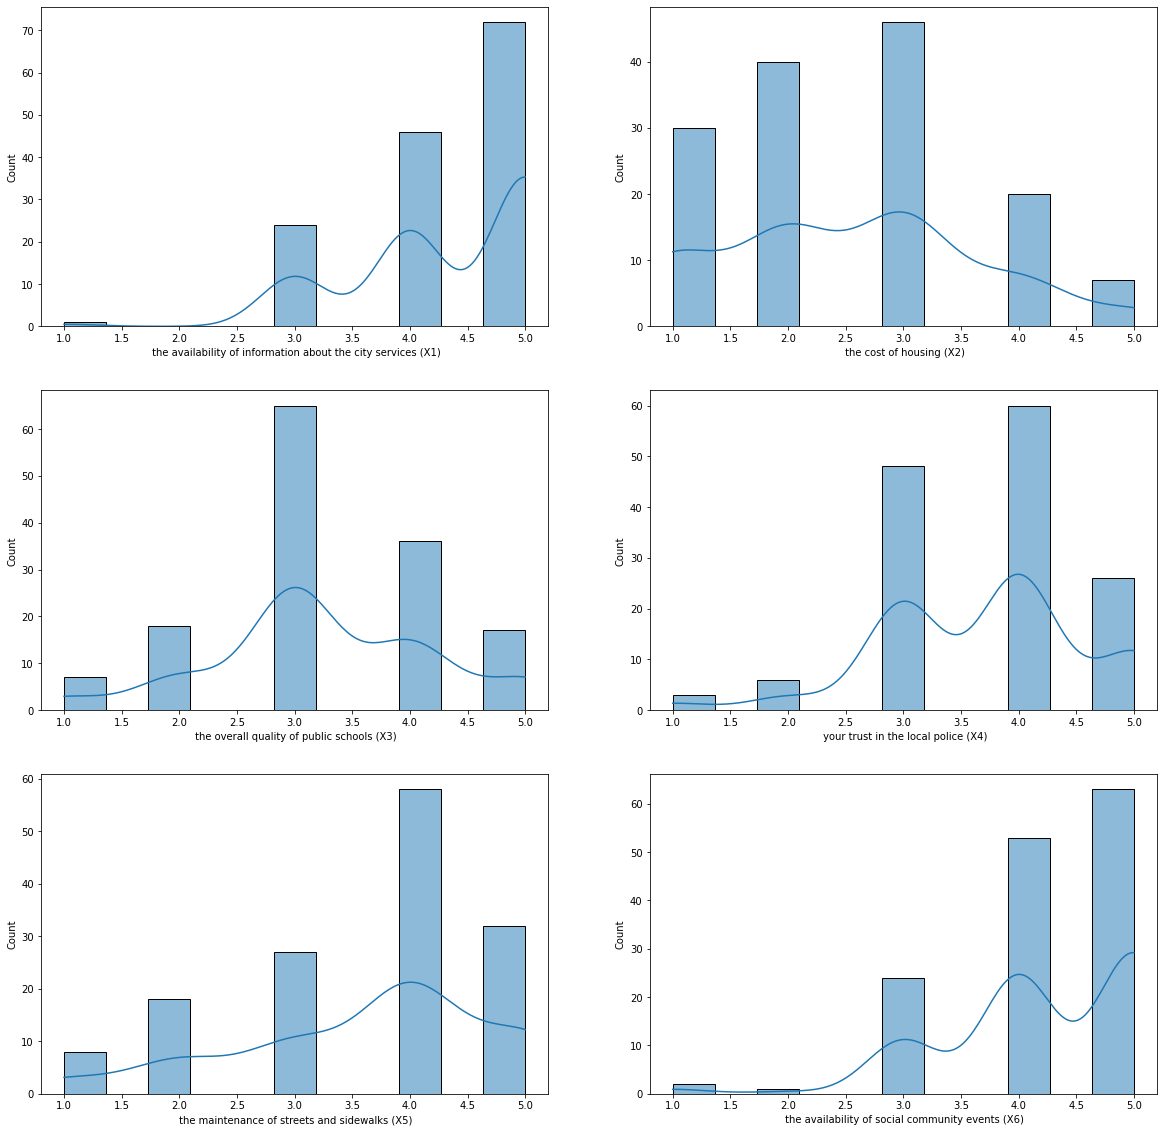

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

sns.histplot(data = happiness_survey, x = 'X1', kde = True, ax=axs[0,0])
sns.histplot(data = happiness_survey, x = 'X2', kde = True, ax=axs[0,1])
sns.histplot(data = happiness_survey, x = 'X3', kde = True, ax=axs[1,0])
sns.histplot(data = happiness_survey, x = 'X4', kde = True, ax=axs[1,1])
sns.histplot(data = happiness_survey, x = 'X5', kde = True, ax=axs[2,0])
sns.histplot(data = happiness_survey, x = 'X6', kde = True, ax=axs[2,1])

axs[0,0].set_xlabel(variable_description['Description'].values.tolist()[1] + ' (X1)')
axs[0,1].set_xlabel(variable_description['Description'].values.tolist()[2] + ' (X2)')
axs[1,0].set_xlabel(variable_description['Description'].values.tolist()[3] + ' (X3)')
axs[1,1].set_xlabel(variable_description['Description'].values.tolist()[4] + ' (X4)')
axs[2,0].set_xlabel(variable_description['Description'].values.tolist()[5] + ' (X5)')
axs[2,1].set_xlabel(variable_description['Description'].values.tolist()[6] + ' (X6)')

We can tell from the histogram plots that variables X1, X4, X5, and X6 are skewed to the left, meaning that their larger values have higher frequencies. X2 seems to be slightly skewed to the right, while X3 is slight skewed to the left, however unlike the previously mentioned distributions, these two variables have modes at half of the range. We can also take a look at the target variable and see how it's frequency distribution looks. 

<AxesSubplot:xlabel='D', ylabel='count'>

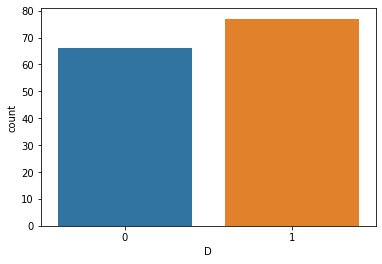

In [7]:
sns.countplot(data = happiness_survey, x = 'D')

In [8]:
pd.DataFrame(data = happiness_survey.groupby('D')['D'].count())

,D
D,
0,66
1,77


We can see from this countplot that the number of participants that identified as being unhappy is 66, while the number of participants that were happy is 77. There is an 11 participant difference. We can also check the statistical characteristics of the independent variables in relation to the target variable. We can do this by looking at the mean, mode, standard deviation, and interquartile ranges.

In [9]:
happiness_survey.groupby('D').mean()

,X1,X2,X3,X4,X5,X6
D,,,,,,
0,4.045455,2.515152,3.090909,3.590909,3.363636,4.015152
1,4.545455,2.558442,3.415584,3.792208,3.831169,4.389610


In [10]:
custom_aggregation = {'X1' : ['mean', 'std', pd.Series.mode],
                     'X2' : ['mean', 'std', pd.Series.mode],
                     'X3' : ['mean', 'std', pd.Series.mode],
                     'X4' : ['mean', 'std', pd.Series.mode],
                     'X5' : ['mean', 'std', pd.Series.mode],
                     'X6' : ['mean', 'std', pd.Series.mode]}

In [11]:
happiness_survey.groupby('D').agg(custom_aggregation)

X1                       X2                       X3                 \
       mean       std mode      mean       std mode      mean       std mode   
D                                                                              
0  4.045455  0.849105  4    2.515152  1.126498  3    3.090909  0.956392  3     
1  4.545455  0.679502  5    2.558442  1.117958  2    3.415584  1.004603  3     

         X4                       X5                       X6                 
       mean       std mode      mean       std mode      mean       std mode  
D                                                                             
0  3.590909  0.894036  4    3.363636  1.171933  4    4.015152  0.902857  4    
1  3.792208  0.878660  4    3.831169  1.056342  4    4.389610  0.763576  5

Text(0.5, 0, ' the availability of social community events (X6)')

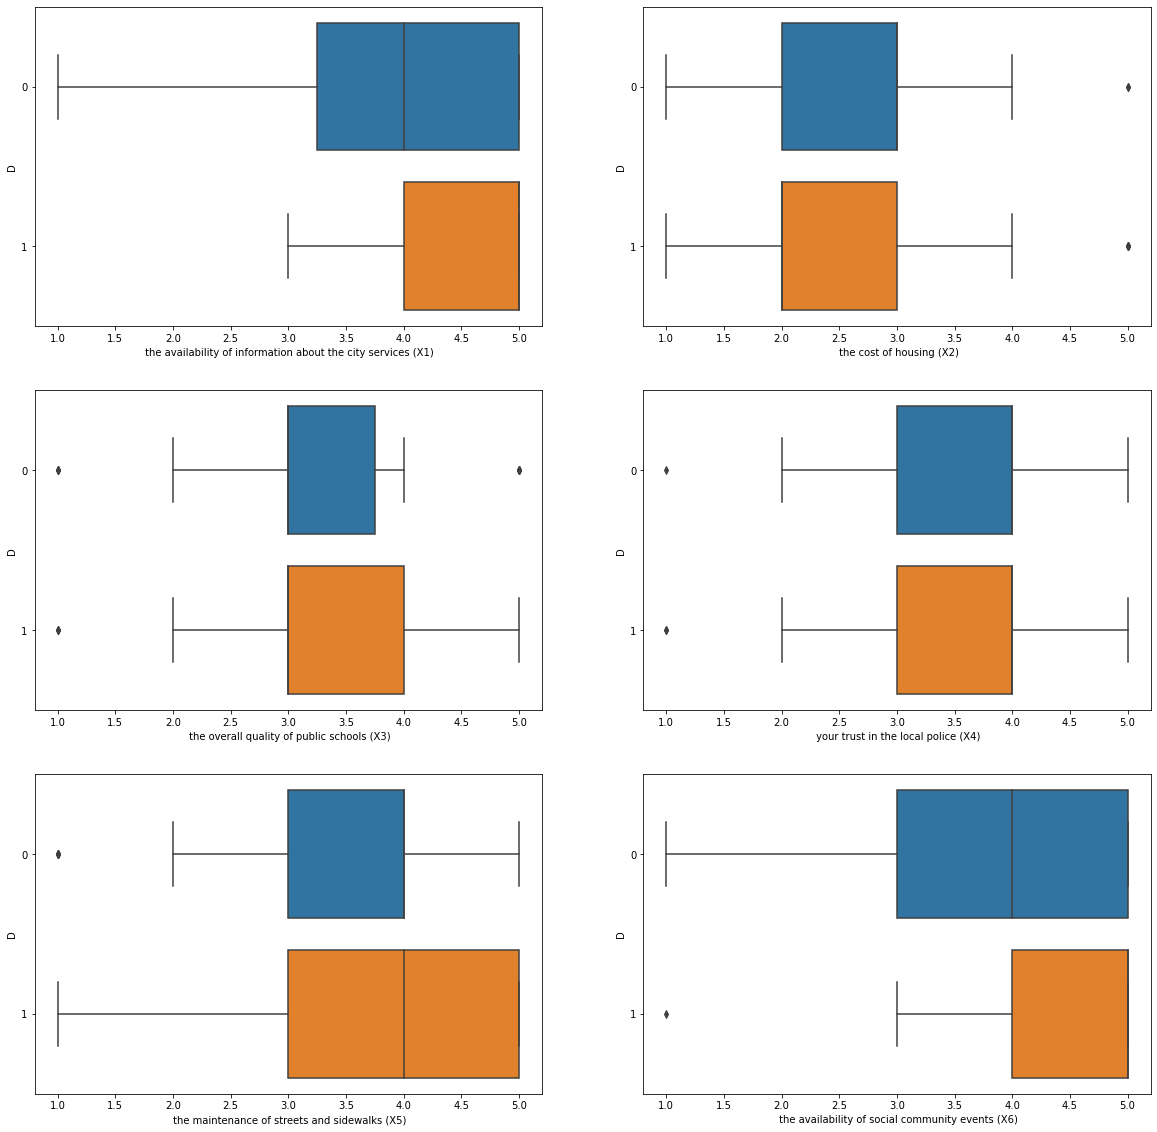

In [21]:
#plt.figure(figsize = (20,20))

#sns.boxplot(data = happiness_survey, x = 'D', y = 'X1')

fig, axs = plt.subplots(3, 2, figsize=(20, 20))



sns.boxplot(data = happiness_survey, y = 'D', x = 'X1', ax=axs[0,0], orient = 'h')
sns.boxplot(data = happiness_survey, y = 'D', x = 'X2', ax=axs[0,1], orient = 'h')
sns.boxplot(data = happiness_survey, y = 'D', x = 'X3', ax=axs[1,0], orient = 'h')
sns.boxplot(data = happiness_survey, y = 'D', x = 'X4', ax=axs[1,1], orient = 'h')
sns.boxplot(data = happiness_survey, y = 'D', x = 'X5', ax=axs[2,0], orient = 'h')
sns.boxplot(data = happiness_survey, y = 'D', x = 'X6', ax=axs[2,1], orient = 'h')


axs[0,0].set_xlabel(variable_description['Description'].values.tolist()[1] + ' (X1)')
axs[0,1].set_xlabel(variable_description['Description'].values.tolist()[2] + ' (X2)')
axs[1,0].set_xlabel(variable_description['Description'].values.tolist()[3] + ' (X3)')
axs[1,1].set_xlabel(variable_description['Description'].values.tolist()[4] + ' (X4)')
axs[2,0].set_xlabel(variable_description['Description'].values.tolist()[5] + ' (X5)')
axs[2,1].set_xlabel(variable_description['Description'].values.tolist()[6] + ' (X6)')

We can see visually from these whisker boxplots that the variables X1, X5, and X6 show the most variation when comparing the results of the participants that said they were happy (D = 1) versus unhappy (D = 2). This mirrors the conclusion derived from the distribution plot, the participants that identified as happy seem to more frequently give higher scores for those variables, meaning that they are generally more satisfied with the condition of the amenities of their place of residence. We can further conclude that these variables could potentially answer the question "Which factors affect people's satisfaction of their place of residence?". So far, the availability of information about city services, the maintenance of streets and sidewalks, and the availability of social community events show greater variance between happy and unhappy participants.  

# Univariate Analysis

In [13]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [89]:
for col in happiness_survey.columns:
    if col == 'D': continue
    else:
        print('WoE and IV for column: {}'.format(variables_dict.get('Description').get(col)))
        df, iv = calculate_woe_iv(happiness_survey, col, 'D')
        print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column:  the availability of information about the city services
   Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1  5      72   22    50   0.333333    0.649351  -0.666830  0.210730
3  1      1    1     0    0.015152    0.000000   0.000000  0.000000
2  4      46   27    19   0.409091    0.246753   0.505549  0.082070
0  3      24   16    8    0.242424    0.103896   0.847298  0.117375
IV score: 0.41


WoE and IV for column:  the cost of housing
   Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
3  5      7    2     5    0.030303    0.064935  -0.762140  0.026394
1  2      40   15    25   0.227273    0.324675  -0.356675  0.034741
0  3      46   22    24   0.333333    0.311688   0.067139  0.001453
4  1      30   16    14   0.242424    0.181818   0.287682  0.017435
2  4      20   11    9    0.166667    0.116883   0.354821  0.017664
IV score: 0.10


WoE and IV for column:  the overall quality of public schools
   Value  All  Good  Bad  Distr_

If we look at the IV scores for features, it seems that every feature's score is above 0.1, meaning that every variable has some predictive power. For the purposes of this analysis, we will be using the top 3 features with the highest IV scores. Those features are X1, X5, and X6, which are the same variables that were highlighted in the previous steps.  

In [90]:
for col in happiness_survey.columns:
    if col in ['D','X2','X3','X4']: continue
    else:
        df, iv = calculate_woe_iv(happiness_survey, col, 'D')
        print(col,variables_dict.get('Description').get(col), ' - IV Score: {:.2f}'.format(iv))
        print('\n')

X1  the availability of information about the city services  - IV Score: 0.41


X5  the maintenance of streets and sidewalks  - IV Score: 0.23


X6  the availability of social community events  - IV Score: 0.24




# Model Development - Logistic Regression

In [154]:
X = happiness_survey.drop(['D','X2','X3','X4'], axis = 1)

y = happiness_survey.D

In [155]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [156]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

Text(0.5, 257.44, 'Predicted label')

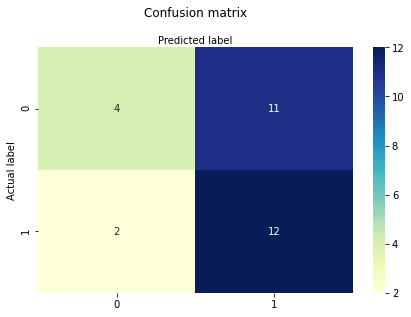

In [157]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [158]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5517241379310345
Precision: 0.5217391304347826
Recall: 0.8571428571428571


The model has an accuracy of around 55% (it changes with every iteration, since the sample is randomly split everytime), which means that the total number of true predictions (true positives + true negatives) makes up 55% of the total predictions that the model has made. It has a similar precision which is the proportion of true positives to true positives and false positives. Our recall, on the other hand, is quite high which is the proportion of true positives to true positives and false negatives. Recall tells us, out of the total number of actual positives, how many of them were classified correctly. This basically means that our model is quite capable of identifying when a citizen is happy, but not when they are unhappy. 

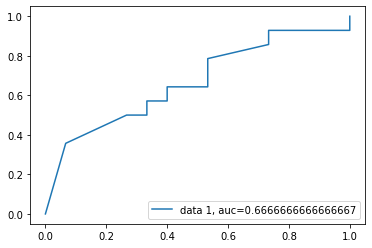

In [159]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Generally, an AUC of above 0.7 is considered acceptable in model development, and our model's ROC curve has an AUC of below 0.7. This is an indicator that we should conduct further analysis and potentially develop another model to tackle this challenge. 

# Further Analysis

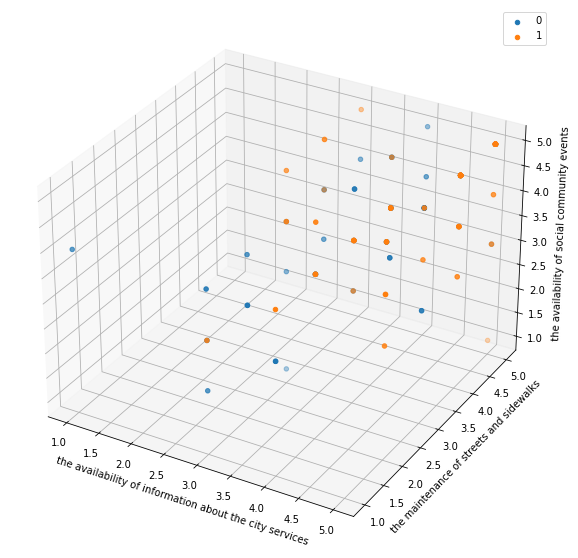

In [171]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")


X1 = happiness_survey['X1']
X5 = happiness_survey['X5']
X6 = happiness_survey['X6']

ax.set_xlabel(variables_dict.get('Description').get('X1'))
ax.set_ylabel(variables_dict.get('Description').get('X5'))
ax.set_zlabel(variables_dict.get('Description').get('X6'))

for d in happiness_survey.D.unique():
    ax.scatter(X1[happiness_survey.D==d],X5[happiness_survey.D==d],X6[happiness_survey.D==d],label=d)
    
ax.legend()

plt.show()

This plot is displaying the three selected features on a 3D plot. We can immediately notice a peculiarty in the plot, there are fewer points than expected. The data set that we are currently exploring contains 143 rows, and since we have selected three features with five ordinal values from 1 to 5, the maximum number of unique combinations is 125. However, according to this plot we have much less than that.

In [190]:
happiness_survey.groupby(['X1','X5','X6'])['D'].size().count()

40

We have 40 unique combinations in the data set. Moreover, there seem to be cases on the plot where points share the same coordinate but are of different classes. These cases are colored brown the on 3D scatter plot, however, the color scheme is not always clear so we can take a look at a cross table of our selected features to see if that is in fact the case. 

In [203]:
happiness_survey.groupby(['X1','X5','X6'])['D'].unique()

X1  X5  X6
1   1   4     [0]   
3   1   2     [0]   
        3     [0, 1]
        4     [0]   
    2   3     [0]   
        4     [0]   
    3   1     [0]   
        3     [0]   
        4     [1, 0]
        5     [1]   
    4   3     [0]   
        4     [1, 0]
        5     [1]   
    5   4     [0]   
        5     [1]   
4   1   3     [0]   
        4     [1]   
    2   4     [1, 0]
        5     [1]   
    3   3     [0, 1]
        4     [1, 0]
        5     [0]   
    4   3     [0]   
        4     [0, 1]
        5     [0, 1]
    5   4     [0]   
        5     [0]   
5   2   3     [1]   
        4     [1]   
        5     [1, 0]
    3   3     [0]   
        4     [1]   
        5     [1, 0]
    4   3     [1]   
        4     [1, 0]
        5     [1, 0]
    5   1     [1]   
        3     [1, 0]
        4     [1]   
        5     [1, 0]
Name: D, dtype: object

In [215]:
combinations_with_two_classes = 0

for x in happiness_survey.groupby(['X1','X5','X6'])['D'].unique():
    if len(x) > 1:
        combinations_with_two_classes += 1

In [217]:
combinations_with_two_classes

14

# Alternative Models - Neural Network

Our logistic regression model takes into consideration only 3 features that we have selected, but the problem with feature selection is that sometimes we might omit features that are in some nature related. The logistic regression model does not factor in the multicollinearity between features, so it might be wise to use an unsupervised like model and have it identify the important features and their relation to the target outcome. 

In [248]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

X = happiness_survey.drop(['D'], axis = 1)

y = happiness_survey.D

model = Sequential()
model.add(Dense(15, input_dim=6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #binary crossentropy is used because
# our class only has two labels

model.fit(X, y, epochs=300, batch_size=11)

_,accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/300
13/13 [==============================] - 1s 4ms/step - loss: 0.6964 - accuracy: 0.4895
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6957 - accuracy: 0.5455
Epoch 3/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6868 - accuracy: 0.5455
Epoch 4/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6833 - accuracy: 0.5524
Epoch 5/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6806 - accuracy: 0.5734
Epoch 6/300
13/13 [==============================] - 0s 5ms/step - loss: 0.6794 - accuracy: 0.5594
Epoch 7/300
13/13 [==============================] - 0s 6ms/step - loss: 0.6777 - accuracy: 0.5734
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5734
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.5874
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5804
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.6229 - accuracy: 0.6713
Epoch 84/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.6643
Epoch 85/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.6783
Epoch 86/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6240 - accuracy: 0.6923
Epoch 87/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.6713
Epoch 88/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6228 - accuracy: 0.6713
Epoch 89/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6196 - accuracy: 0.6783
Epoch 90/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.6503
Epoch 91/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6188 - accuracy: 0.6853
Epoch 92/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6203 - accuracy: 0.6643
Epoch 93/300


13/13 [==============================] - 0s 2ms/step - loss: 0.5859 - accuracy: 0.6923
Epoch 165/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.6923
Epoch 166/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.7063
Epoch 167/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5768 - accuracy: 0.6993
Epoch 168/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.6993
Epoch 169/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7203
Epoch 170/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5755 - accuracy: 0.6993
Epoch 171/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.6993
Epoch 172/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.6853
Epoch 173/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5752 - accuracy: 0.7133
Epoc

13/13 [==============================] - 0s 2ms/step - loss: 0.5430 - accuracy: 0.7273
Epoch 246/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7483
Epoch 247/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5431 - accuracy: 0.7343
Epoch 248/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7273
Epoch 249/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5421 - accuracy: 0.7552
Epoch 250/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.7273
Epoch 251/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.7413
Epoch 252/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.7343
Epoch 253/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7273
Epoch 254/300
13/13 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.7203
Epoc

The accuracy of our neural network model is significantly better than our logistic regression model, even though the average score varies with each iteration. 